In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
data, target = load_digits(return_X_y=True)
print(data.shape)
print(target.shape)

(1797, 64)
(1797,)


<Figure size 432x288 with 0 Axes>

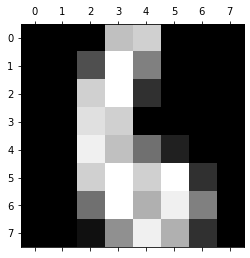

In [0]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[6]) 
plt.show() 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, random_state=42)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 16
X_test /= 16

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [0]:
model = Sequential([
    Dense(32, input_shape=(64,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1347/1347 [==============================] - 2s 1ms/step - loss: 2.2361 - accuracy: 0.1774
Epoch 2/5
1347/1347 [==============================] - 0s 69us/step - loss: 1.7857 - accuracy: 0.5100
Epoch 3/5
1347/1347 [==============================] - 0s 69us/step - loss: 1.2291 - accuracy: 0.7728
Epoch 4/5
1347/1347 [==============================] - 0s 71us/step - loss: 0.8079 - accuracy: 0.8612
Epoch 5/5
1347/1347 [==============================] - 0s 77us/step - loss: 0.5731 - accuracy: 0.8909


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.524
Test Accuracy: 0.876


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras import regularizers
def make_model(optimizer="adam", hidden_size=32, l2_reg=0.001):
    model = Sequential()
    model.add(Dense(hidden_size,activation='relu', input_shape=(64,), kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dense(hidden_size,activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)
param_grid = {'epochs': [5, 10, 15],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256],
              'l2_reg': [0.0001,0.001, 0.01]
              }
grid = GridSearchCV(clf, param_grid=param_grid, return_train_score=True)
grid.fit(X_train, y_train)

Epoch 1/5
1077/1077 [==============================] - 0s 151us/step - loss: 2.2487 - accuracy: 0.2219
Epoch 2/5
1077/1077 [==============================] - 0s 76us/step - loss: 1.9872 - accuracy: 0.4095
Epoch 3/5
1077/1077 [==============================] - 0s 80us/step - loss: 1.6065 - accuracy: 0.6119
Epoch 4/5
1077/1077 [==============================] - 0s 84us/step - loss: 1.1682 - accuracy: 0.7985
Epoch 5/5
1077/1077 [==============================] - 0s 37us/step
Epoch 1/5
1077/1077 [==============================] - 0s 164us/step - loss: 2.2714 - accuracy: 0.1699
Epoch 2/5
1077/1077 [==============================] - 0s 81us/step - loss: 1.9807 - accuracy: 0.4643
Epoch 3/5
1077/1077 [==============================] - 0s 73us/step - loss: 1.5967 - accuracy: 0.6518
Epoch 4/5
1077/1077 [==============================] - 0s 74us/step - loss: 1.1652 - accuracy: 0.8115
Epoch 5/5
1077/1077 [==============================] - 0s 38us/step
Epoch 1/5
1078/1078 [=========================

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6bad76a908>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [5, 10, 15], 'hidden_size': [32, 64, 256],
                         'l2_reg': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [0]:
import pandas as pd
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size", "param_l2_reg"],
                values=["mean_train_score", "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size param_l2_reg                                   
5            32                0.0001               0.874528          0.883632
                               0.0010               0.881176          0.889019
                               0.0100               0.842605          0.852084
             64                0.0001               0.917591          0.935221
                               0.0010               0.920559          0.939120
                               0.0100               0.913141          0.922234
             256               0.0001               0.962861          0.979212
                               0.0010               0.951722          0.970117
                               0.0100               0.941341          0.956753
10           32                0.0001               0.927964          0.950261
                               0.0010               0.930962          0.944132
                               0.0100               0.915355          0.932625
             64                0.0001               0.955429          0.973645
                               0.0010               0.952485          0.969003
                               0.0100               0.939122          0.955086
             256               0.0001               0.971780          0.996473
                               0.0010               0.964351          0.993690
                               0.0100               0.953207          0.970121
15           32                0.0001               0.947278          0.966963
                               0.0010               0.939862          0.966035
                               0.0100               0.935401          0.945061
             64                0.0001               0.963605          0.990535
                               0.0010               0.961391          0.984039
                               0.0100               0.950993          0.966963
             256               0.0001               0.976236          0.999258
                               0.0010               0.975484          0.997772
                               0.0100               0.951717          0.966224

In [0]:
score = grid.best_estimator_.score(X_test, y_test, verbose=0)
print('Test Accuracy: ', score)

Test Accuracy:  0.9777777791023254


Gridsearch has helped us to find the best estimator with appropriate number of hidden units and L2 regualarization strength for our model. There has been a dramatic improvement in the test accuracy from **87.60%** to **97.77%**